**Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import random
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
tf.random.set_seed(42)
from nlp_model_text_preprocessing import index_the_words, text_to_sequence, pad_sequences, one_hot_encoding, index_the_char, text_to_sequence_char, char_sequence_to_text, word_sequence_to_text
from arabic_text_normalization import text_normalization
from deep_learning import nlp_model_word, nlp_model_char, model_compile_word, model_compile_char, model_fit, plot_word_model_change, plot_char_model_change
from model_testing import model_testing_char, model_testing_word
from transformers_models import load_dataset, data_collator, train_arguments, training_, save_model_tokenizer, transformer_testing,transformes_model
from read_data import read_file
from generate_train_label import generate_train_label_word, generate_train_label_char
from model_check_point import check_point
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

**Ignore Warnings**

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

**Read Data**

In [3]:
Corpus = read_file(file_path='الخيميائي.txt', text_normalization=text_normalization)
len(Corpus)

1242

In [4]:
with open('Cleaned_Corpus.txt', 'w') as f:
    for line in Corpus:
        f.write(line + '\n') 

**Generate Early Stop Depending On Value Of Loss**

In [5]:
early_stop_ = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    mode = 'min',
    restore_best_weights=True,
)

**1-Tokens Based On Word**

In [6]:
# Generate Word To Index, Index To Word, And Find Count Of All Words
all_words, words_index, index_to_words = index_the_words(Corpus)
all_words

8911

In [7]:
max_length_word, train, labels = generate_train_label_word(Corpus, text_to_sequence, words_index, pad_sequences)
max_length_word

163

In [8]:
# Convert Label Data 
label = one_hot_encoding(labels, all_words)
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Deep Learning Models*

Epoch 1/150
872/872 [==============================] - 38s 42ms/step - loss: 8.2398 - accuracy: 0.0245
Epoch 2/150
872/872 [==============================] - 34s 39ms/step - loss: 7.7049 - accuracy: 0.0278
Epoch 3/150
872/872 [==============================] - 36s 41ms/step - loss: 7.4289 - accuracy: 0.0332
Epoch 4/150
872/872 [==============================] - 36s 41ms/step - loss: 7.0688 - accuracy: 0.0437
Epoch 5/150
872/872 [==============================] - 36s 41ms/step - loss: 6.5930 - accuracy: 0.0567
Epoch 6/150
872/872 [==============================] - 37s 42ms/step - loss: 6.0512 - accuracy: 0.0767
Epoch 7/150
872/872 [==============================] - 37s 42ms/step - loss: 5.4991 - accuracy: 0.1064
Epoch 8/150
872/872 [==============================] - 35s 40ms/step - loss: 4.9612 - accuracy: 0.1594
Epoch 9/150
872/872 [==============================] - 35s 40ms/step - loss: 4.4324 - accuracy: 0.2344
Epoch 10/150
872/872 [==============================] - 36s 41ms/step - l

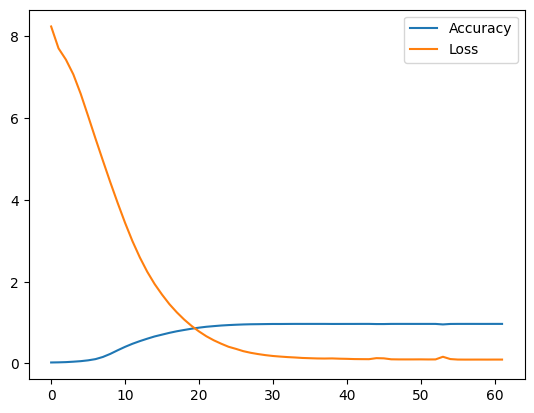

In [9]:
# 1-LSTM
arabic_lstm_check_point_1 = check_point('Arabic_Lstm_1')
lstm_model = tf.keras.layers.LSTM(units=128, return_sequences=False)
LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = lstm_model)
model_compile_word(model =LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=arabic_lstm_check_point_1 ,batch_size=32)
plot_word_model_change(history=history)

Epoch 1/150
436/436 [==============================] - 50s 108ms/step - loss: 8.2218 - accuracy: 0.0249
Epoch 2/150
436/436 [==============================] - 45s 104ms/step - loss: 7.6713 - accuracy: 0.0299
Epoch 3/150
436/436 [==============================] - 45s 104ms/step - loss: 7.3700 - accuracy: 0.0351
Epoch 4/150
436/436 [==============================] - 44s 101ms/step - loss: 6.9809 - accuracy: 0.0436
Epoch 5/150
436/436 [==============================] - 45s 103ms/step - loss: 6.5328 - accuracy: 0.0526
Epoch 6/150
436/436 [==============================] - 42s 97ms/step - loss: 6.0731 - accuracy: 0.0700
Epoch 7/150
436/436 [==============================] - 42s 97ms/step - loss: 5.6190 - accuracy: 0.0892
Epoch 8/150
436/436 [==============================] - 42s 97ms/step - loss: 5.1857 - accuracy: 0.1240
Epoch 9/150
436/436 [==============================] - 43s 98ms/step - loss: 4.7683 - accuracy: 0.1805
Epoch 10/150
436/436 [==============================] - 42s 97ms/ste

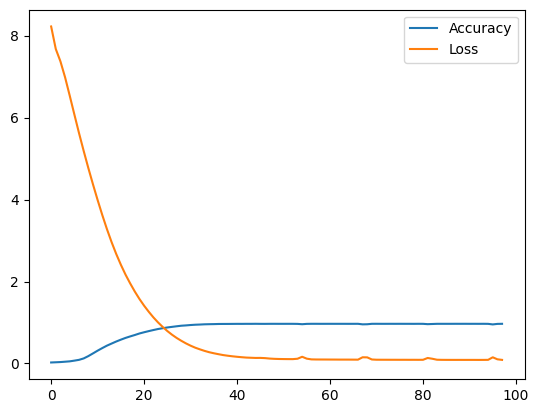

In [10]:
# 2-Bidirectional LSTM
arabic_bidirectional_lstm_check_point_1 = check_point('Arabic_Bidirectional_1')
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = bidirectional_lstm_model)
model_compile_word(model =Bidirectional_LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=Bidirectional_LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=arabic_bidirectional_lstm_check_point_1, batch_size=64)
plot_word_model_change(history=history)

Epoch 1/150
872/872 [==============================] - 44s 46ms/step - loss: 8.2472 - accuracy: 0.0260
Epoch 2/150
872/872 [==============================] - 35s 40ms/step - loss: 7.5387 - accuracy: 0.0371
Epoch 3/150
872/872 [==============================] - 37s 42ms/step - loss: 6.9618 - accuracy: 0.0570
Epoch 4/150
872/872 [==============================] - 34s 39ms/step - loss: 6.2465 - accuracy: 0.0828
Epoch 5/150
872/872 [==============================] - 34s 39ms/step - loss: 5.4492 - accuracy: 0.1191
Epoch 6/150
872/872 [==============================] - 34s 39ms/step - loss: 4.6658 - accuracy: 0.1923
Epoch 7/150
872/872 [==============================] - 34s 38ms/step - loss: 3.9332 - accuracy: 0.3064
Epoch 8/150
872/872 [==============================] - 34s 39ms/step - loss: 3.2743 - accuracy: 0.4250
Epoch 9/150
872/872 [==============================] - 34s 39ms/step - loss: 2.6904 - accuracy: 0.5237
Epoch 10/150
872/872 [==============================] - 34s 39ms/step - l

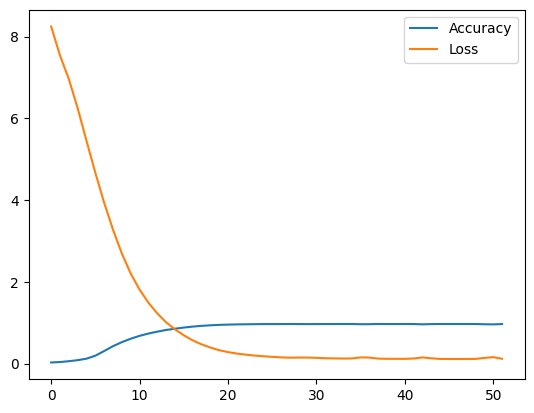

In [11]:
# 3-GRU
arabic_gru_check_point_1 = check_point('Arabic_GRU1')
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = gru_model)
model_compile_word(model =GRU_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=GRU_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=arabic_gru_check_point_1 , batch_size=32)
plot_word_model_change(history=history)

*Testing The Model*

In [12]:
# 1-LSTM
model_testing_word(text = 'تناول الخيميائي ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='Arabic_Lstm_1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'تناول الخيميائي بيده كتاباً كان قد أحضره أحد أفراد القافلة لم يكن للكتاب غلاف ولكنه استطاع على الرغم من ذلك التعرف على اسم الكاتب أوسكار وايلد وهو يقلب صفحاته وقع نظره على قصة كانت تتحدث عن نرجس لاشك أن الخيميائي يعرف أسطورة نرجس هذا الشاب الوسيم الذي يذهب كل يوم ليتأمل بهاءه'

In [13]:
# 2-Bidirectional LSTM
model_testing_word(text = 'رأى تاجر الزجاجيّات شروق ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='Arabic_Bidirectional_1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه منذ مايقارب الثلاثين عاماً وكان متجره يقع في قمّة طريق منحدرة ومن النادر مرور زبون واحد من هناك وقد فات الأوان على التاجر كي يغيّر مهنته فكل ماكان قد تعلّمه عبر حياته كلّها هو بيع وشراء'

In [15]:
# 3-GRU
model_testing_word(text = 'إن مافهمه في تلك اللحظة ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='Arabic_GRU1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'إن مافهمه في تلك اللحظة هو انه أمام امرأة حياته وعليها أن تعلم ذلك دونما أية ضرورة للكلام كان متأكداً من هذا أكثر من تأكده من أي شيء آخر في العالم على الرغم من أن آبائه وآباء آبائه كانوا قد قالوا إن على الانسان أن يحب أولاً ثم يخطب أن يعرف الآخر وأن يملك المال'

**2-Token Based On Character**

In [16]:
# Generate Char To Index, Index To Char, And Find Count Of All Char
all_chars, chars_index, index_chars = index_the_char(Corpus)
all_chars

45

In [17]:
chars_index

{' ': 0,
 'ء': 1,
 'آ': 2,
 'أ': 3,
 'ؤ': 4,
 'إ': 5,
 'ئ': 6,
 'ا': 7,
 'ب': 8,
 'ة': 9,
 'ت': 10,
 'ث': 11,
 'ج': 12,
 'ح': 13,
 'خ': 14,
 'د': 15,
 'ذ': 16,
 'ر': 17,
 'ز': 18,
 'س': 19,
 'ش': 20,
 'ص': 21,
 'ض': 22,
 'ط': 23,
 'ظ': 24,
 'ع': 25,
 'غ': 26,
 'ف': 27,
 'ق': 28,
 'ك': 29,
 'ل': 30,
 'م': 31,
 'ن': 32,
 'ه': 33,
 'و': 34,
 'ى': 35,
 'ي': 36,
 'ً': 37,
 'ٌ': 38,
 'ٍ': 39,
 'َ': 40,
 'ُ': 41,
 'ِ': 42,
 'ّ': 43,
 'ْ': 44,
 'UNK': 45}

In [18]:
# Find The Max Length
max_length_char = max([len(s) for s in Corpus])
max_length_char

866

In [19]:
# Generate Train And Label Data
Train, Label = generate_train_label_char(Corpus, max_length_char)

In [20]:
# Convert Words Into Number
sequence_text_char_Train = text_to_sequence_char(chars_index, Train)
sequence_text_char_Label = text_to_sequence_char(chars_index, Label)

In [21]:
# Padding The The Input Sequence To Make All Sequence In Same Length
Train = pad_sequences(input_sequence=sequence_text_char_Train, max_length=max_length_char, padding='post')
# # Convert The Label Data
Label = one_hot_encoding(sequence_text_char_Label, all_chars)

**Deep Learning Model**

In [ ]:
# 1-LSTM
arabic_bidirectional_lstm_check_point_2 = check_point('Arabic_Bidirectional_2')
lstm_model = tf.keras.layers.LSTM(units= 128, return_sequences=False)
LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = lstm_model, input_length=max_length_char)
model_compile_char(model =LSTM_2, optiizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop,  batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 2-Bidirectional_LSTM
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = bidirectional_lstm_model, input_length=max_length_char)
model_compile_char(model =Bidirectional_LSTM_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=Bidirectional_LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 3-GRU
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = gru_model, input_length=max_length_char)
model_compile_char(model =GRU_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=GRU_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, batch_size=32)
plot_char_model_change(history=history)

**Model Testing**

In [ ]:
# 1-LSTM
model_testing_char(text = 'أضاءت أشعة القمر ', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, model = LSTM_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 2-Bidirectional LSTM
model_testing_char(text = 'أضاءت أشعة القمر ', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, model = Bidirectional_LSTM_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 3-GRU
model_testing_char(text = 'أضاءت أشعة القمر ', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, model = GRU_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

**3-Transformers**

In [ ]:
# Transformers Model Name
import torch
model_name_ = 'gpt2'
# Model And Tokenizer For Transformers
tokenizer, model = transformes_model(model_name_)
# Data Used For Train Transformers
train_dataset = load_dataset('Cleaned_Corpus.txt', tokenizer)
# Convert Data Into Batches
collator = data_collator(tokenizer)
# Set Arguments For Train The Transformers
train_args = train_arguments(epochs = 1)
# Train The Transformers
training_(model=model, training_args=train_args, collator = collator, data = train_dataset)
# Save The Model
save_model_tokenizer(model = model, tokenizer = tokenizer)
# Testing The Transformers Model
transformer_testing(input_text='إنني خيميائي ', tokenizer=tokenizer, model=model, text_normalization = text_normalization)
 